<!--HEADER-->
[*NBBinder test on a collection of notebooks about some thermodynamic properperties of water*](https://github.com/rmsrosa/nbbinder)

<!--BADGES-->
<a href="https://colab.research.google.com/github/rmsrosa/nbbinder/blob/master/nb_builds/tests/nb_alice/05.00-Best_AIC_Fitting.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Google Colab" title="Open in Google Colab"></a>
&nbsp;<a href="https://mybinder.org/v2/gh/rmsrosa/nbbinder/master?filepath=nb_builds/tests/nb_alice/05.00-Best_AIC_Fitting.ipynb"><img align="left" src="https://mybinder.org/badge.svg" alt="Binder" title="Open in binder"></a>
&nbsp;<a href="https://nbviewer.jupyter.org/github/rmsrosa/nbbinder/blob/master/nb_builds/tests/nb_water/05.00-Best_AIC_Fitting.ipynb"><img align="left" src="https://img.shields.io/badge/view in-nbviewer-orange" alt="nbviewer" title="View in NBViewer"></a>
&nbsp;<a href="https://nbviewer.jupyter.org/github/rmsrosa/nbbinder/blob/master/tests/nb_builds/nb_water_slides/05.00-Best_AIC_Fitting.slides.html"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="slides" title="View Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- High-Dimensional Fittings](04.00-High_Dim_Fittings.ipynb) | [Water](00.00-Water_Contents.ipynb) | [References](BA.00-References.ipynb) | [References ->](BA.00-References.ipynb)

---


# Best AIC Fitting

In this final notebook, we use the idea of Akaike Information Criteria (AIC) (see [Bender (2000)](BA.00-References.ipynb)) to find out the most efficient polynomial approximation.

## Importing the libraries

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

## Akaike Information Criteria

Beink $k$ the number of parameters in the model, $N$ the number of data points in the sample, and $E_k$ the mean quadratic error with the approximation with $k$ parameters, the **Akaike information criteria (AIK)** is given by

$$
  \text{AIC} = N\ln(E_k) + 2(k+1)
$$

The first term decreases with $E_k$, but the second term penalizes a high number of parameters.

There are a number of other criteria, such as *Bayesian information criteria (BIC)*, $C_p$ (similar to *AIC*), *AICc* (for a low number of samples), adjusted $R^2$; *ridge regression*; and *cross validation*.

In [5]:
water_csv = list(csv.reader(open('water.csv',"r"), delimiter=","))
header = dict([(water_csv[0][i],water_csv[1][i]) for i in range(3)])
datapoints = np.loadtxt(open('water.csv', "r"), delimiter=",", skiprows=2)
T, f = np.loadtxt(open('water.csv', "r"), delimiter=",", skiprows=2, usecols=(0,1), unpack=True)
N = len(T)
N_half = int(N/2)

In [6]:
A = list()
for j in range(N_half):
    A.append(np.vstack([T**i for i in range(j+1)]).T)
    

In [7]:
Err = list()
for j in range(N_half):
    Err.append(np.linalg.lstsq(A[j], f, rcond=None)[1][0]/N)
    print(f'j={j}: Error={Err[j]:.2e}')

j=0: Error=1.75e-04
j=1: Error=9.22e-06
j=2: Error=1.33e-07
j=3: Error=3.16e-09
j=4: Error=3.27e-10
j=5: Error=2.64e-10
j=6: Error=2.64e-10


In [10]:
aic = [len(T)*np.log(Err[j]) + 2*(j+2) for j in range(N_half)]

In [11]:
aic

[-125.7408972999171,
 -167.91033709771884,
 -229.5222773322343,
 -283.5924622219091,
 -315.63200723667956,
 -316.8095935328548,
 -314.826846744734]

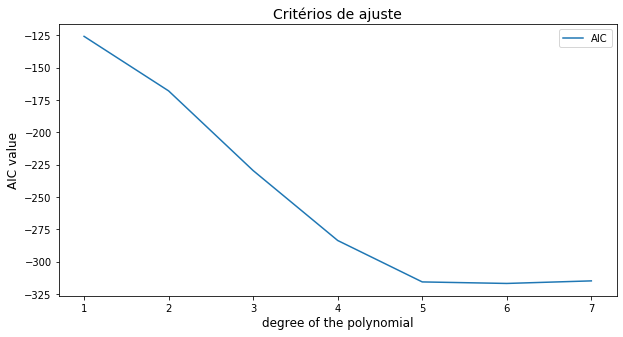

In [15]:
plt.figure(figsize=(10,5))
plt.plot(range(1,len(aic)+1),aic, label='AIC')
plt.legend()
plt.xlabel('degree of the polynomial', fontsize=12)
plt.ylabel('AIC value', fontsize=12)
plt.title('Critérios de ajuste', fontsize=14)
plt.show()

<!--NAVIGATOR-->

---
[<- High-Dimensional Fittings](04.00-High_Dim_Fittings.ipynb) | [Water](00.00-Water_Contents.ipynb) | [References](BA.00-References.ipynb) | [References ->](BA.00-References.ipynb)